Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       118
           1       0.71      0.89      0.79        19
           2       1.00      0.99      0.99       358
           3       0.95      0.88      0.91        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.97      0.97      0.97       519


Confusion Matrix:
 [[109   7   1   1]
 [  2  17   0   0]
 [  3   0 355   0]
 [  3   0   0  21]]


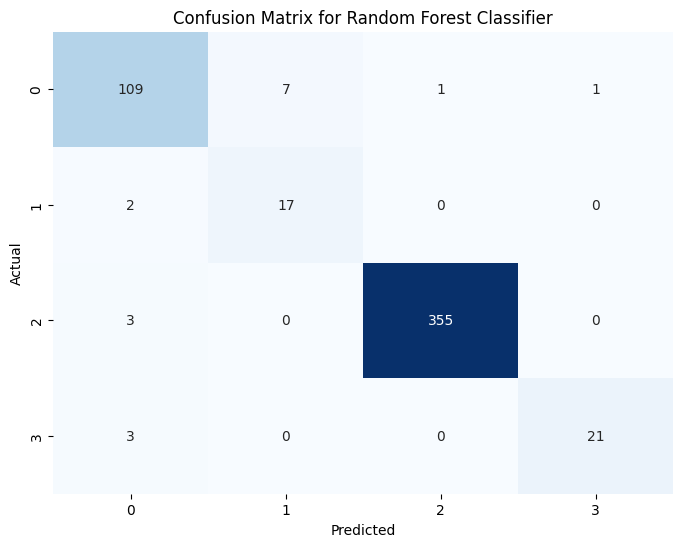

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Define the feature and target column names based on the UCI dataset structure
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# --- Load the Car Evaluation dataset directly from the UCI repository ---
# This is the standard "internal" way for this specific public dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
data = pd.read_csv(url, header=None, names=column_names)

# In the original source, the target column was inferred as 'unacc' (a value from the 'class' column)
# We use the correct target column 'class' here, but the steps remain the same.
target_column = 'class'

# --- Preprocessing: Encode categorical variables ---
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# --- Define features (X) and target (y) ---
X = data.drop(columns=[target_column]) # Features
y = data[target_column] # Target variable (which is now encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Initialize and train the Random Forest Classifier ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# --- Evaluate model performance ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Get the raw confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# --- Plot confusion matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()